In [13]:
# generate experiment plan

exps = []
read_size = [4, 8, 16, 32, 64, 128]

In [14]:
# for rs in read_size:
#     for ef in [False, True]:
#         plan = {
#             "read_size": rs,
#             "dataset": '/hdd/ILSVRC/Data/CLS-LOC/*/*/*.JPEG',
#             "remote": False,
#             "enable_fscache": ef
#         }    
#         exps.append(plan)

In [15]:
# for rs in read_size:
#     plan = {
#         "read_size": rs,
#         "dataset": '/runtime/imagenet/*/*/*.JPEG',
#         "use_cache": True,
#         "enable_fscache": True
#     }
#     exps.append(plan)

In [16]:
# for rs in read_size:
#     plan = {
#         "read_size": rs,
#         "dataset": 'imagenet/',
#         "use_cache": True,
#         "enable_fscache": True
#     }
#     exps.append(plan)

In [17]:
# import json
# with open('configs.json', 'w') as f:
#     json.dump(exps, f, sort_keys=True, indent=4)

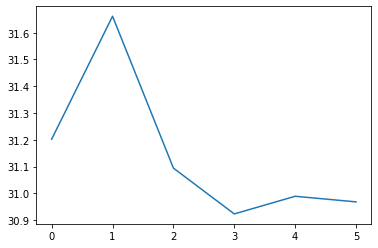

In [20]:
import glob
import numpy as np
import json
import matplotlib.pyplot as plt

files = glob.glob("./data/*.npy")
with open('configs.json', 'r') as f:
    configs = json.load(f)

files.sort()
rlt = []
for i in range(len(configs)):
    data = np.load('./data/run2/exp_{}.npy'.format(i))
    if not configs[i]['enable_fscache']:
        rlt.append(np.mean(data)*1e3)

plt.plot(rlt)
plt.show()

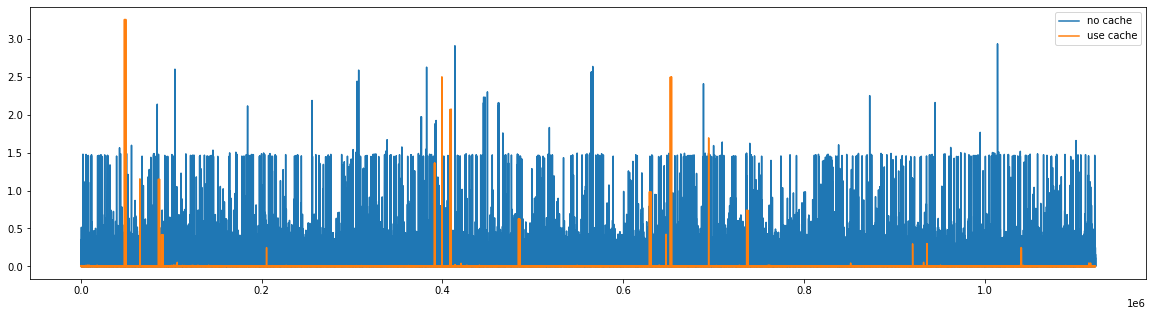

In [19]:
data1 = np.load('./data/run1/exp_10.npy')
data2 = np.load('./data/run1/exp_11.npy')

plt.figure(figsize=(20, 5))
plt.plot(data1, label='no cache')
plt.plot(data2, label='use cache')
plt.legend()
plt.show()